In [1]:
import os
import upsetplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_words(path):
    input_file = open(path, encoding='UTF-8')
    stop_words = input_file.readlines()
    input_file.close()
    stop_words = list(map(lambda x:x.strip(), stop_words))
    # only keep English words
    #stop_words = list(map(lambda x:re.sub("[^a-z]+", "", x), stop_words))
    stop_words = list(filter(lambda x:len(x) > 0, stop_words))
    # there are some duplicate stop words
    stop_words = list(set(stop_words))
    return stop_words

def plot_result(queries, output_path = None):
    DIR = "stopwords/en/"
    result = {}
    for stop_word_file in os.listdir(DIR):
        # _none.txt doesn't contain any stop word
        if stop_word_file == "_none.txt":
            continue
        # these files contain ngrams, not just single words
        if stop_word_file in ["galago_structured.txt", "gilner_morales.txt"]:
            continue
        # This is meant to augment another list, and so is confusing here
        if stop_word_file == "galago_forumstop.txt":
            continue
        words = set(get_words(os.path.join(DIR, stop_word_file)))
        result[stop_word_file[:-4]] = {q: q in words for q in queries}   
    result = pd.DataFrame(result).transpose()

    aggregates = result.astype(bool).reset_index().groupby(queries[::-1]).count()
    upsetplot.plot(aggregates['index'], sort_sets_by=None,
                   sort_by='cardinality', intersection_plot_elements=4)
    if output_path is None:
        plt.show()
    else:
        plt.savefig(output_path, dpi=300, bbox_inches='tight')

C:\Anaconda2\envs\py35\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


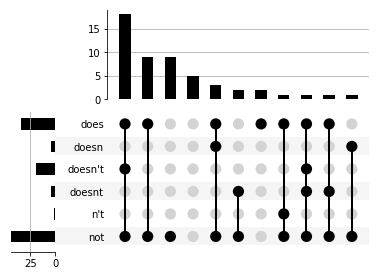

In [3]:
queries = ["does", "doesn", "doesn't", "doesnt", "n't", "not"]
plot_result(queries, "figures/does-upset.png")

C:\Anaconda2\envs\py35\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


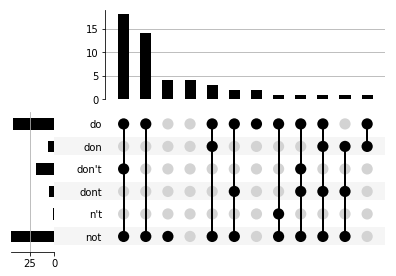

In [4]:
queries = ["do", "don", "don't", "dont", "n't", "not"]
plot_result(queries)

C:\Anaconda2\envs\py35\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


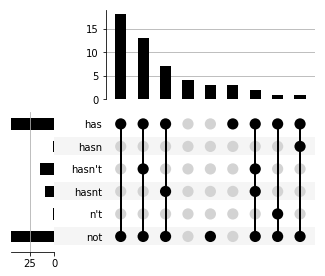

In [5]:
queries = ["has", "hasn", "hasn't", "hasnt", "n't", "not"]
plot_result(queries)

C:\Anaconda2\envs\py35\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


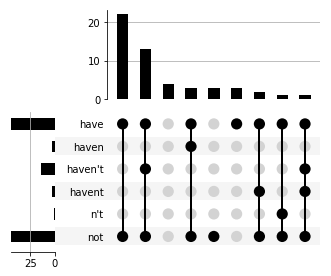

In [6]:
queries = ["have", "haven", "haven't", "havent", "n't", "not"]
plot_result(queries)

C:\Anaconda2\envs\py35\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


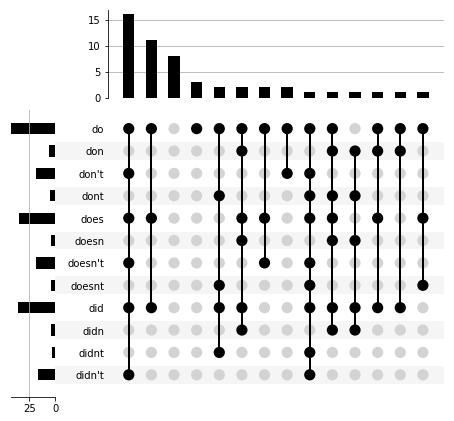

In [7]:
queries = ["do", "don", "don't", "dont", "does", "doesn", "doesn't", "doesnt", "did", "didn", "didnt", "didn't"]
plot_result(queries)

C:\Anaconda2\envs\py35\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


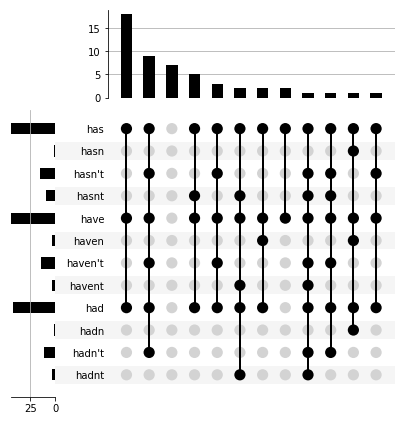

In [8]:
queries = ["has", "hasn", "hasn't", "hasnt", "have", "haven", "haven't", "havent", "had", "hadn", "hadn't", "hadnt"]
plot_result(queries, "figures/have-upset.png")